### データインポート

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


df_est = pd.read_csv('/content/drive/MyDrive/認知実験分析/予測なし実験分析/res_estimations_.csv')
df_pred = pd.read_csv('/content/drive/MyDrive/認知実験分析/予測なし実験分析/res_predictions_.csv')

In [24]:
df_est

,user_id,animal,est_i,estimation
0,19639354,pigeon,0,55
1,19639354,pigeon,1,66
2,19639354,pigeon,2,62
3,19639354,pigeon,3,66
4,19639354,pigeon,4,69
...,...,...,...,...
67,4917741,rabbit,1,50
68,4917741,rabbit,2,52
69,4917741,rabbit,3,50
70,4917741,rabbit,4,53


In [25]:
df_pred

,user_id,animal,pred_i,stimulation,cause,effect,prediction
0,19639354,pigeon,0,b,1,0,NaN
1,19639354,pigeon,1,a,1,1,NaN
2,19639354,pigeon,2,a,1,1,NaN
3,19639354,pigeon,3,a,1,1,NaN
4,19639354,pigeon,4,a,1,1,NaN
...,...,...,...,...,...,...,...
715,4917741,rabbit,55,c,0,1,NaN
716,4917741,rabbit,56,c,0,1,NaN
717,4917741,rabbit,57,d,0,0,NaN
718,4917741,rabbit,58,a,1,1,NaN


In [26]:
df_est_mouse = df_est[df_est['animal'] == 'mouse']
df_est_rabbit = df_est[df_est['animal'] == 'rabbit']
df_est_pigeon = df_est[df_est['animal'] == 'pigeon']

### 動物ごとの推定値の平均

In [27]:
# ΔP = 0.70
df_est_mouse['estimation'].mean()

59.416666666666664

In [28]:
# ΔP = 0.47
df_est_rabbit['estimation'].mean()

56.916666666666664

In [29]:
# ΔP = 0.23
df_est_pigeon['estimation'].mean()

61.958333333333336

### 10刺激ごとの平均値の可視化

In [30]:
# マウス # ΔP = 0.70
df_est_mouse_each = [0,0,0,0,0,0]
df_est_mouse_each_mean = []
for i in range(5):
  df_est_mouse_each[i] = df_est_mouse[df_est_mouse['est_i'] == i+1]

df_est_mouse_each[5] = df_est_mouse[df_est_mouse['est_i'] == 0]

for i in range(len(df_est_mouse_each)):
  df_est_mouse_each_mean.append(df_est_mouse_each[i]['estimation'].mean())

print(df_est_mouse_each_mean)

[64.5, 63.5, 58.25, 55.25, 54.25, 60.75]


In [31]:
# うさぎ # ΔP = 0.47
df_est_rabbit_each = [0,0,0,0,0,0]
df_est_rabbit_each_mean = []
for i in range(5):
  df_est_rabbit_each[i] = df_est_rabbit[df_est_rabbit['est_i'] == i+1]

df_est_rabbit_each[5] = df_est_rabbit[df_est_rabbit['est_i'] == 0]

for i in range(len(df_est_rabbit_each)):
  df_est_rabbit_each_mean.append(df_est_rabbit_each[i]['estimation'].mean())

print(df_est_rabbit_each_mean)

[49.5, 50.0, 63.25, 63.5, 65.75, 49.5]


In [32]:
# はと # ΔP = 0.23
df_est_pigeon_each = [0,0,0,0,0,0]
df_est_pigeon_each_mean = []
for i in range(5):
  df_est_pigeon_each[i] = df_est_pigeon[df_est_pigeon['est_i'] == i+1]

df_est_pigeon_each[5] = df_est_pigeon[df_est_pigeon['est_i'] == 0]

for i in range(len(df_est_pigeon_each)):
  df_est_pigeon_each_mean.append(df_est_pigeon_each[i]['estimation'].mean())

print(df_est_pigeon_each_mean)

[63.25, 62.25, 64.75, 67.25, 58.75, 55.5]


In [33]:
# それぞれのリストからDFを作成
Blocks_of_Trials = [1,2,3,4,5,6]
df = pd.DataFrame({'Blocks_of_Trials':Blocks_of_Trials , '0.70(mouse)':df_est_mouse_each_mean, '0.47(rabbit)':df_est_rabbit_each_mean, '0.23(pigeon)':df_est_pigeon_each_mean})

df.head(6)

,Blocks_of_Trials,0.70(mouse),0.47(rabbit),0.23(pigeon)
0,1,64.50,49.50,63.25
1,2,63.50,50.00,62.25
2,3,58.25,63.25,64.75
3,4,55.25,63.50,67.25
4,5,54.25,65.75,58.75
5,6,60.75,49.50,55.50


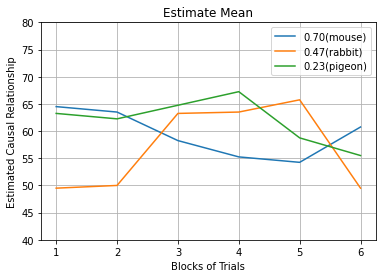

In [34]:
df.plot(title='Estimate Mean',grid=True,x=df.columns[0], xlabel='Blocks of Trials', ylabel='Estimated Causal Relationship', ylim=[40,80])

### モデル定義

In [35]:
# ΔP
def deltaP (a, b, c, d) :
  return ( a*d - b*c ) / ((a+b)*(c+d))

# DFH
def DFH (a, b, c, d):
  return a / math.sqrt((a+b)*(a+c))

# pARIs
def pARIs (a, b, c, d):
  return a / (a+b+c)

In [36]:
# マウスの刺激
print('ΔP: ', deltaP(21, 9, 0, 30))
print('DFH: ', DFH(21, 9, 0, 30))
print('pARIs: ', pARIs(21, 9, 0, 30))
print('mean: ', df_est_mouse['estimation'].mean())

ΔP:  0.7
DFH:  0.8366600265340756
pARIs:  0.7
mean:  59.416666666666664


In [37]:
# うさぎの刺激
print('ΔP: ', deltaP(24, 6, 10, 20))
print('DFH: ', DFH(24, 6, 10, 20))
print('pARIs: ', pARIs(24, 6, 10, 20))
print('mean: ', df_est_rabbit['estimation'].mean())

ΔP:  0.4666666666666667
DFH:  0.7514691493021795
pARIs:  0.6
mean:  56.916666666666664


In [38]:
# 鳩の刺激
print('ΔP: ', deltaP(27, 3, 20, 10))
print('DFH: ', DFH(27, 3, 20, 10))
print('pARIs: ', pARIs(27, 3, 20, 10))
print('mean: ', df_est_pigeon['estimation'].mean())

ΔP:  0.23333333333333334
DFH:  0.7190419157432651
pARIs:  0.54
mean:  61.958333333333336


### 10刺激ごとのモデルの予測値と人間の推定値の可視化


#### マウス (ΔP=0.70設定)

In [39]:
# マウス刺激 
df_pred_mouse_b = [0,0,0,0,0,0]
a = [0,0,0,0,0,0]
b = [0,0,0,0,0,0]
c = [0,0,0,0,0,0]
d = [0,0,0,0,0,0]
ΔP_pre = [0,0,0,0,0,0]
DFH_pre = [0,0,0,0,0,0]
pARIs_pre = [0,0,0,0,0,0]

for i in range(6):

  df_pred_mouse = df_pred[df_pred['animal']=='mouse']
  df_pred_mouse_b[i] = df_pred_mouse[(df_pred_mouse['pred_i']>=0) & (df_pred_mouse['pred_i']<=(10*i) + 9)]
  a[i] = len(df_pred_mouse_b[i][df_pred_mouse_b[i]['stimulation']=='a'])
  b[i] = len(df_pred_mouse_b[i][df_pred_mouse_b[i]['stimulation']=='b'])
  c[i] = len(df_pred_mouse_b[i][df_pred_mouse_b[i]['stimulation']=='c'])
  d[i] = len(df_pred_mouse_b[i][df_pred_mouse_b[i]['stimulation']=='d'])

  ΔP_pre[i] = deltaP(a[i], b[i], c[i], d[i]) * 100
  DFH_pre[i] = DFH(a[i], b[i], c[i], d[i]) * 100
  pARIs_pre[i] = pARIs(a[i], b[i], c[i], d[i]) * 100

print('ΔP: ', ΔP_pre)
print('DFH: ', DFH_pre)
print('pARIs: ', pARIs_pre)
print('mean: ', df_est_mouse_each_mean)

ΔP:  [94.44444444444444, 76.74418604651163, 75.38461538461539, 71.60493827160494, 68.68686868686868, 70.0]
DFH:  [97.18253158075501, 87.60375907831333, 86.82431421244591, 84.61970117626564, 82.87754140107481, 83.66600265340756]
pARIs:  [94.44444444444444, 76.74418604651163, 75.38461538461539, 71.60493827160494, 68.68686868686868, 70.0]
mean:  [64.5, 63.5, 58.25, 55.25, 54.25, 60.75]


In [40]:
# それぞれのリストからDFを作成
Blocks_of_Trials = [1,2,3,4,5,6]
df_mouse = pd.DataFrame({'Blocks_of_Trials':Blocks_of_Trials , 'ΔP':ΔP_pre, 'DFH':DFH_pre, 'pARIs':pARIs_pre, 'human':df_est_mouse_each_mean})

df_mouse.head(6)

,Blocks_of_Trials,ΔP,DFH,pARIs,human
0,1,94.444444,97.182532,94.444444,64.50
1,2,76.744186,87.603759,76.744186,63.50
2,3,75.384615,86.824314,75.384615,58.25
3,4,71.604938,84.619701,71.604938,55.25
4,5,68.686869,82.877541,68.686869,54.25
5,6,70.000000,83.666003,70.000000,60.75


##### グラフ

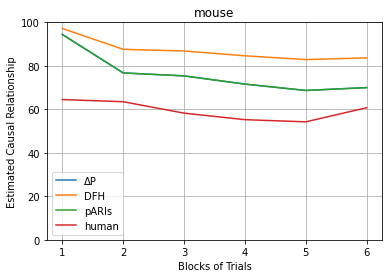

In [41]:
df_mouse.plot(title='mouse', grid=True, x=df_mouse.columns[0], xlabel='Blocks of Trials', ylabel='Estimated Causal Relationship', ylim=[0,100])

##### 相関係数

In [42]:
# 相関係数
df_mouse.corr()

,Blocks_of_Trials,ΔP,DFH,pARIs,human
Blocks_of_Trials,1.000000,-0.846318,-0.855066,-0.846318,-0.624654
ΔP,-0.846318,1.000000,0.999787,1.000000,0.724891
DFH,-0.855066,0.999787,1.000000,0.999787,0.730472
pARIs,-0.846318,1.000000,0.999787,1.000000,0.724891
human,-0.624654,0.724891,0.730472,0.724891,1.000000


#### ウサギ (ΔP=0.47設定)

In [43]:
# ウサギ刺激 
df_pred_rabbit_b = [0,0,0,0,0,0]
a = [0,0,0,0,0,0]
b = [0,0,0,0,0,0]
c = [0,0,0,0,0,0]
d = [0,0,0,0,0,0]
ΔP_pre = [0,0,0,0,0,0]
DFH_pre = [0,0,0,0,0,0]
pARIs_pre = [0,0,0,0,0,0]

for i in range(6):

  df_pred_rabbit = df_pred[df_pred['animal']=='rabbit']
  df_pred_rabbit_b[i] = df_pred_rabbit[(df_pred_rabbit['pred_i']>=0) & (df_pred_rabbit['pred_i']<=(10*i) + 9)]
  a[i] = len(df_pred_rabbit_b[i][df_pred_rabbit_b[i]['stimulation']=='a'])
  b[i] = len(df_pred_rabbit_b[i][df_pred_rabbit_b[i]['stimulation']=='b'])
  c[i] = len(df_pred_rabbit_b[i][df_pred_rabbit_b[i]['stimulation']=='c'])
  d[i] = len(df_pred_rabbit_b[i][df_pred_rabbit_b[i]['stimulation']=='d'])

  ΔP_pre[i] = deltaP(a[i], b[i], c[i], d[i]) * 100
  DFH_pre[i] = DFH(a[i], b[i], c[i], d[i]) * 100
  pARIs_pre[i] = pARIs(a[i], b[i], c[i], d[i]) * 100

print('ΔP: ', ΔP_pre)
print('DFH: ', DFH_pre)
print('pARIs: ', pARIs_pre)
print('mean: ', df_est_rabbit_each_mean)

ΔP:  [50.0, 43.87177875549968, 43.48430119477633, 46.43527204502814, 48.0948094809481, 46.666666666666664]
DFH:  [70.71067811865476, 72.71792483455795, 72.66576158984059, 73.6876126183612, 75.08682769352801, 75.14691493021795]
pARIs:  [54.54545454545454, 56.60377358490566, 56.9620253164557, 58.252427184466015, 60.0, 60.0]
mean:  [49.5, 50.0, 63.25, 63.5, 65.75, 49.5]


In [44]:
# それぞれのリストからDFを作成
Blocks_of_Trials = [1,2,3,4,5,6]
df_rabbit = pd.DataFrame({'Blocks_of_Trials':Blocks_of_Trials , 'ΔP':ΔP_pre, 'DFH':DFH_pre, 'pARIs':pARIs_pre, 'human':df_est_rabbit_each_mean})

df_rabbit.head(6)

,Blocks_of_Trials,ΔP,DFH,pARIs,human
0,1,50.000000,70.710678,54.545455,49.50
1,2,43.871779,72.717925,56.603774,50.00
2,3,43.484301,72.665762,56.962025,63.25
3,4,46.435272,73.687613,58.252427,63.50
4,5,48.094809,75.086828,60.000000,65.75
5,6,46.666667,75.146915,60.000000,49.50


##### グラフ

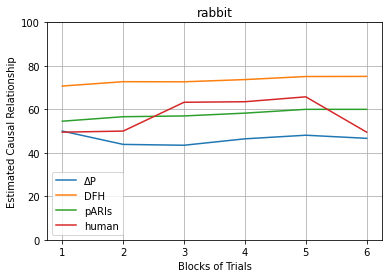

In [45]:
df_rabbit.plot(title='rabbit', grid=True, x=df_rabbit.columns[0], xlabel='Blocks of Trials', ylabel='Estimated Causal Relationship', ylim=[0,100])

##### 相関係数

In [46]:
df_rabbit.corr()

,Blocks_of_Trials,ΔP,DFH,pARIs,human
Blocks_of_Trials,1.000000,-0.022542,0.961638,0.974762,0.317704
ΔP,-0.022542,1.000000,-0.118232,-0.072301,-0.145758
DFH,0.961638,-0.118232,1.000000,0.996625,0.354290
pARIs,0.974762,-0.072301,0.996625,1.000000,0.390992
human,0.317704,-0.145758,0.354290,0.390992,1.000000


#### ハト (ΔP=0.23設定)

In [47]:
# ハト刺激 
df_pred_pigeon_b = [0,0,0,0,0,0]
a = [0,0,0,0,0,0]
b = [0,0,0,0,0,0]
c = [0,0,0,0,0,0]
d = [0,0,0,0,0,0]
ΔP_pre = [0,0,0,0,0,0]
DFH_pre = [0,0,0,0,0,0]
pARIs_pre = [0,0,0,0,0,0]

for i in range(6):

  df_pred_pigeon = df_pred[df_pred['animal']=='pigeon']
  df_pred_pigeon_b[i] = df_pred_pigeon[(df_pred_pigeon['pred_i']>=0) & (df_pred_pigeon['pred_i']<=(10*i) + 9)]
  a[i] = len(df_pred_pigeon_b[i][df_pred_pigeon_b[i]['stimulation']=='a'])
  b[i] = len(df_pred_pigeon_b[i][df_pred_pigeon_b[i]['stimulation']=='b'])
  c[i] = len(df_pred_pigeon_b[i][df_pred_pigeon_b[i]['stimulation']=='c'])
  d[i] = len(df_pred_pigeon_b[i][df_pred_pigeon_b[i]['stimulation']=='d'])

  ΔP_pre[i] = deltaP(a[i], b[i], c[i], d[i]) * 100
  DFH_pre[i] = DFH(a[i], b[i], c[i], d[i]) * 100
  pARIs_pre[i] = pARIs(a[i], b[i], c[i], d[i]) * 100

print('ΔP: ', ΔP_pre)
print('DFH: ', DFH_pre)
print('pARIs: ', pARIs_pre)
print('mean: ', df_est_pigeon_each_mean)

ΔP:  [41.333333333333336, 31.11111111111111, 26.189805688538442, 25.41176470588235, 24.92997198879552, 23.333333333333332]
DFH:  [81.70594879790282, 77.62145068043219, 74.69118289767141, 74.02753475111994, 72.60741013925593, 71.90419157432652]
pARIs:  [68.75, 62.121212121212125, 58.58585858585859, 57.14285714285714, 55.15151515151515, 54.0]
mean:  [63.25, 62.25, 64.75, 67.25, 58.75, 55.5]


In [48]:
# それぞれのリストからDFを作成
Blocks_of_Trials = [1,2,3,4,5,6]
df_pigeon = pd.DataFrame({'Blocks_of_Trials':Blocks_of_Trials , 'ΔP':ΔP_pre, 'DFH':DFH_pre, 'pARIs':pARIs_pre, 'human':df_est_pigeon_each_mean})

df_pigeon.head(6)

,Blocks_of_Trials,ΔP,DFH,pARIs,human
0,1,41.333333,81.705949,68.750000,63.25
1,2,31.111111,77.621451,62.121212,62.25
2,3,26.189806,74.691183,58.585859,64.75
3,4,25.411765,74.027535,57.142857,67.25
4,5,24.929972,72.607410,55.151515,58.75
5,6,23.333333,71.904192,54.000000,55.50


##### グラフ

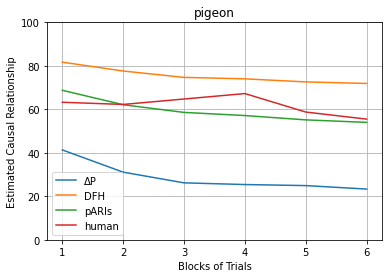

In [49]:
df_pigeon.plot(title='pigeon', grid=True, x=df_pigeon.columns[0], xlabel='Blocks of Trials', ylabel='Estimated Causal Relationship', ylim=[0,100])

##### 相関係数

In [50]:
df_pigeon.corr()

,Blocks_of_Trials,ΔP,DFH,pARIs,human
Blocks_of_Trials,1.000000,-0.870050,-0.944253,-0.945056,-0.590466
ΔP,-0.870050,1.000000,0.980324,0.981512,0.277013
DFH,-0.944253,0.980324,1.000000,0.998774,0.401047
pARIs,-0.945056,0.981512,0.998774,1.000000,0.410020
human,-0.590466,0.277013,0.401047,0.410020,1.000000


In [51]:
# 決定係数
r2_score(df_pigeon['human'], df_pigeon['pARIs'])

-1.0727229196870534

In [52]:
r2_score(df_pigeon['human'], df_pigeon['DFH'])

-12.207855247001932